## Project  

#Link
[View on GitHub](https://github.com/TonyBai1230/DSCI100-Project-YuqianBai)


### Background  
In the field of online gaming, behavioral data offers rich insights into player engagement and preferences. Understanding how and when players interact with a game can help developers optimize user experiences and personalize outreach strategies. This project leverages real-world data collected from a Minecraft server operated by researchers at the University of British Columbia (UBC), which tracks player sessions including login and logout times.

Our goal is to investigate whether specific in-game behaviors can help predict if a player will subscribe to a game-related newsletter. By identifying such patterns, game developers can improve targeted communication and recruitment efforts.

### Research Question  
In this project, I choose question 1 which is:

**"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**

To answer this, we focus on two measurable behavioral features:
- The **average duration** of a player's sessions
- The **average time of day** the player logs in

Our specific research question becomes:  
**"Can average session duration and average login hour predict whether a player will subscribe to the newsletter?"**

### Data Description  
We use two datasets:
- **players.csv**: Contains each player's hashed email (`hashedEmail`) and whether or not they subscribed to the newsletter (`subscribe`, a Boolean variable). This dataset also includes demographic features such as age, gender, and play experience.

We join these datasets by the shared `hashedEmail` field to construct a new dataset used for modeling. The final dataset includes both the outcome variable (`subscribe`) and the engineered behavioral predictors.

In [33]:
library(tidyverse)

In [34]:
player<-read_csv("players.csv")
head(player)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [35]:
players_clean <- select(player, -hashedEmail, -name)
head(players_clean)

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17


In [44]:
gender <- count(players_clean, gender)
head(gender)

gender,n
<fct>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11


In [45]:
install.packages("mltools")
install.packages("data.table")

library(mltools)
library(data.table)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [46]:
players_clean$gender <- as.factor(players_clean$gender)
player_1h <- one_hot(as.data.table(players_clean))
head(player_1h)

experience_Amateur,experience_Beginner,experience_Pro,experience_Regular,experience_Veteran,subscribe,played_hours,gender_Agender,gender_Female,gender_Male,gender_Non-binary,gender_Other,gender_Prefer not to say,gender_Two-Spirited,Age
<int>,<int>,<int>,<int>,<int>,<lgl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
0,0,1,0,0,TRUE,30.3,0,0,1,0,0,0,0,9
0,0,0,0,1,TRUE,3.8,0,0,1,0,0,0,0,17
0,0,0,0,1,FALSE,0.0,0,0,1,0,0,0,0,17
1,0,0,0,0,TRUE,0.7,0,1,0,0,0,0,0,21
0,0,0,1,0,TRUE,0.1,0,0,1,0,0,0,0,21
1,0,0,0,0,TRUE,0.0,0,1,0,0,0,0,0,17


In [47]:
players_clean$experience <- as.factor(players_clean$experience)

player_exp <- players_clean |> select(-gender)

player_1h_exp <- one_hot(as.data.table(player_exp))

head(player_1h_exp)

experience_Amateur,experience_Beginner,experience_Pro,experience_Regular,experience_Veteran,subscribe,played_hours,Age
<int>,<int>,<int>,<int>,<int>,<lgl>,<dbl>,<dbl>
0,0,1,0,0,TRUE,30.3,9
0,0,0,0,1,TRUE,3.8,17
0,0,0,0,1,FALSE,0.0,17
1,0,0,0,0,TRUE,0.7,21
0,0,0,1,0,TRUE,0.1,21
1,0,0,0,0,TRUE,0.0,17


In [48]:
player_exp$experience <- player_exp$experience |>
  fct_recode("1" = "Beginner", 
             "2" = "Amateur", 
             "3" = "Regular", 
             "4" = "Veteran", 
             "5" = "Pro")
head(player_exp)

experience,subscribe,played_hours,Age
<fct>,<lgl>,<dbl>,<dbl>
5,TRUE,30.3,9
4,TRUE,3.8,17
4,FALSE,0.0,17
2,TRUE,0.7,21
3,TRUE,0.1,21
2,TRUE,0.0,17


In [49]:
library(tidyverse)
library(tidymodels)

players <- read_csv("players.csv") |> 
  mutate(subscribe = factor(subscribe))

set.seed(123)
split <- initial_split(players, prop = 0.8, strata = subscribe)
train <- training(split)
test <- testing(split)

rec <- recipe(subscribe ~ played_hours + Age, data = train)

mod <- nearest_neighbor(neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

wf <- workflow() |>
      add_model(mod) |>
      add_recipe(rec)

folds <- vfold_cv(train, v = 5, strata = subscribe)
grid_vals <- tibble(neighbors = seq(1, 15, 2))

res <- tune_grid(wf,
      resamples = folds,
      grid = grid_vals,
      metrics = metric_set(accuracy, recall))

best_k <- select_best(res, metric = "accuracy")
final_wf <- finalize_workflow(wf, best_k)

final_fit <- last_fit(final_wf, split)

collect_metrics(final_fit)

conf_mat <- collect_predictions(final_fit) |>
        conf_mat(truth = subscribe, estimate = .pred_class)
conf_mat

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 30 rows.
               ✖ Assigned data has 31 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 31 to size 30.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.6250000,Preprocessor1_Model1
roc_auc,binary,0.4858934,Preprocessor1_Model1


          Truth
Prediction FALSE TRUE
     FALSE     5    9
     TRUE      6   20

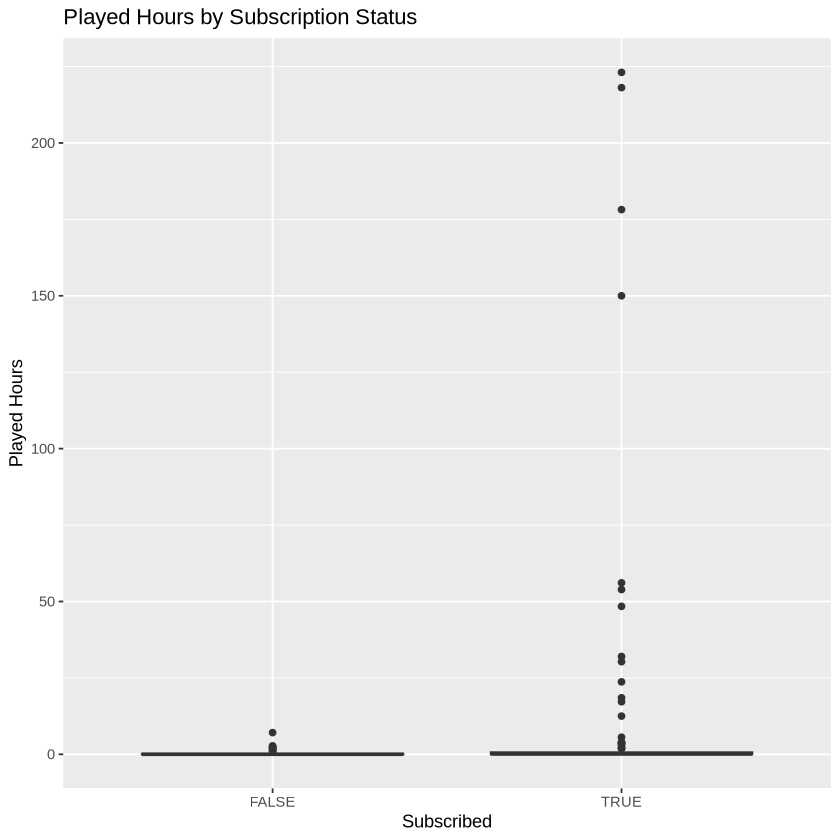

In [50]:
library(ggplot2)

ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Subscribed",
    y = "Played Hours"
  )

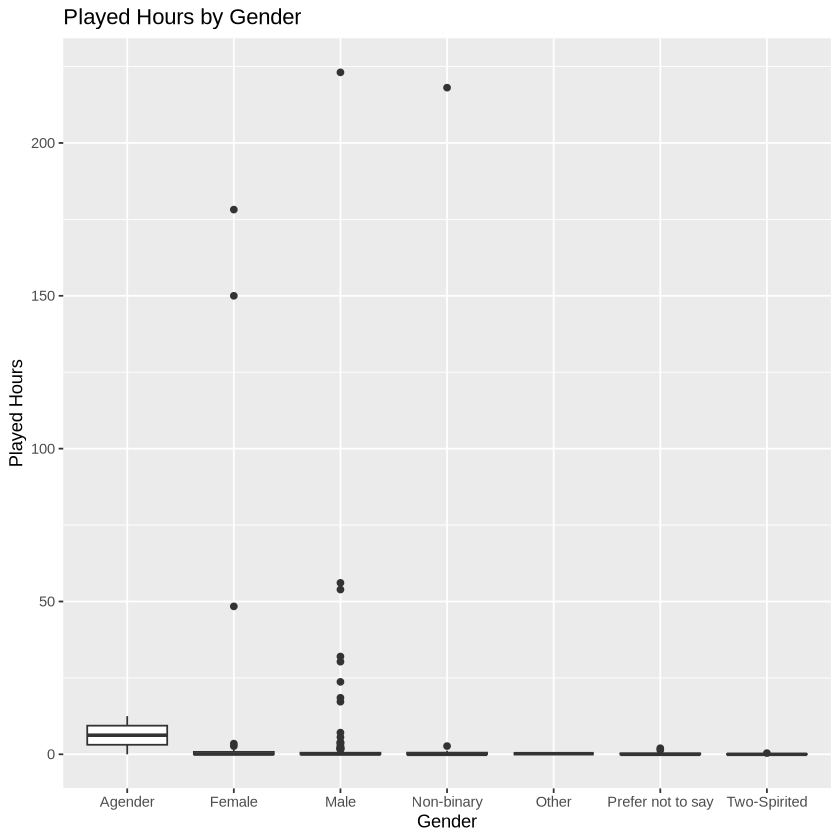

In [51]:
ggplot(players, aes(x = gender, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Gender",
    x = "Gender",
    y = "Played Hours"
  )

### Discussion Summary

| Aspect                         | Observation                                                                                     | Interpretation                                                                                      | Future Questions                                                                 |
|-------------------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| Subscription vs. Play Hours   | Subscribers tend to have more played hours than non-subscribers.                               | More engaged users are likely to subscribe.                                                         | What content encourages subscriptions the most?                                  |
| Gender vs. Play Hours         | Male and agender users showed higher playtime compared to other gender categories.             | Possible differences in engagement patterns across gender.                                           | How does gender influence playing behavior or subscription decisions?            |
| Model Accuracy                | The model achieved ~62.5% accuracy.                                                             | Model has moderate predictive power using age and played hours.                                      | Can adding more features (e.g., session duration) improve the model?             |
| Potential Impact              | Targeted communication could be developed based on behavior and demographic indicators.        | Helps optimize marketing strategies and user retention.                                              | Could real-time personalization increase newsletter sign-ups?                    |

> One-hot encoding was conducted using the `one_hot()` function from the **mltools** package in R (mltools, 2022).  
> For more information on the use of the dollar sign operator (`$`) in R, see Bobbitt (2022).

### References

- mltools. (2022). *mltools: Machine Learning Tools*. R package version 0.3.5. Retrieved from [https://search.r-project.org/CRAN/refmans/mltools/html/one_hot.html](https://search.r-project.org/CRAN/refmans/mltools/html/one_hot.html)

- Bobbitt, Z. (2022, March 12). *Dollar Sign in R (With Examples)*. Statology. Retrieved from [https://www.statology.org/dollar-sign-in-r/](https://www.statology.org/dollar-sign-in-r/)